<a href="https://colab.research.google.com/github/Farbeenanalakath/Detection-of-pupil-emotion-and-face-recognition-in-online-education/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Sequential


In [ ]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [ ]:
classes=['airplane','automobile	','bird','cat','deer','dog','frog	','horse','ship	','truck']

'ship\t'

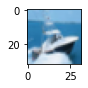

In [ ]:
plt.figure(figsize=(10,1))
plt.imshow(xtrain[8])
ytrain[8]
classes[8]

In [ ]:
def plot_image(index):
  plt.figure(figsize=(10,1))
  plt.imshow(xtrain[index])
  ind=int(ytrain[index])
  plt.title(classes[ind])
  plt.axis('off')


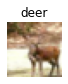

In [ ]:
plot_image(1001)

In [ ]:
xtrain=tf.image.resize(xtrain,(64,64))
xtest=tf.image.resize(xtest,(64,64))


xtrain.shape

In [ ]:
#AlexNet

In [ ]:
model=Sequential()
#covolutionlayer 1
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(4,4),activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#conv2
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))

#conv3
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),activation='relu',padding="same"))
model.add(BatchNormalization())


#conv4
model.add(Conv2D(filters=128,kernel_size=(1,1),strides=(1,1),activation='relu',padding='same'))
model.add(BatchNormalization())


#conv5
model.add(Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten
model.add(Flatten())

#Fcl1
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

#Fcl2
model.add(Dense(1024,activation='softmax'))


In [ ]:
model.compile(loss='SparseCategoricalCrossentropy',optimizer=SGD(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 15, 15, 256)       19456     
                                                                 
 batch_normalization_5 (Batc  (None, 15, 15, 256)      1024      
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 256)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 256)         1638656   
                                                                 
 batch_normalization_6 (Batc  (None, 7, 7, 256)        1024      
 hNormalization)                                                 
                                                      

In [ ]:
trained_history=model.fit(xtrain,ytrain,batch_size=10,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
5000/5000 [==============================] - 89s 16ms/step - loss: 1.7725 - accuracy: 0.3714 - val_loss: 1.8915 - val_accuracy: 0.3856
Epoch 2/50
5000/5000 [==============================] - 84s 17ms/step - loss: 1.3829 - accuracy: 0.5125 - val_loss: 1.2824 - val_accuracy: 0.5607
Epoch 3/50
5000/5000 [==============================] - 79s 16ms/step - loss: 1.2290 - accuracy: 0.5701 - val_loss: 1.1746 - val_accuracy: 0.5830
Epoch 4/50
5000/5000 [==============================] - 79s 16ms/step - loss: 1.1121 - accuracy: 0.6152 - val_loss: 1.0522 - val_accuracy: 0.6370
Epoch 5/50
5000/5000 [==============================] - 84s 17ms/step - loss: 1.0251 - accuracy: 0.6434 - val_loss: 0.9948 - val_accuracy: 0.6571
Epoch 6/50
5000/5000 [==============================] - 79s 16ms/step - loss: 0.9509 - accuracy: 0.6709 - val_loss: 1.0154 - val_accuracy: 0.6568
Epoch 7/50
5000/5000 [==============================] - 84s 17ms/step - loss: 0.8901 - accuracy: 0.6921 - val_loss: 1.0297 -